In [1]:
import numpy as np
np.random.seed(1337)

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

Using TensorFlow backend.


W0718 22:46:14.344899 19396 deprecation_wrapper.py:119] From D:\Anaconda3\envs\mlcc\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 22:46:14.378794 19396 deprecation_wrapper.py:119] From D:\Anaconda3\envs\mlcc\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 22:46:14.387772 19396 deprecation_wrapper.py:119] From D:\Anaconda3\envs\mlcc\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



(60000, 784)
(10000, 784)


D:\Anaconda3\envs\mlcc\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
D:\Anaconda3\envs\mlcc\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
W0718 22:46:14.583270 19396 deprecation_wrapper.py:119] From D:\Anaconda3\envs\mlcc\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 22:46:14.814386 19396 deprecation_wrapper.py:119] From D:\Anaconda3\envs\mlcc\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0718 22:46:15.120134 19396 deprecation_wrapper.py:119] From D:\Anaconda3\envs\mlcc\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.

Epoch 1/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0699
Epoch 2/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0552
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0510
Epoch 4/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0487:
Epoch 5/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0470: 0s
Epoch 6/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0459
Epoch 7/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0449: 0s - loss: 0.0 - ETA: 0s - loss: 0.04
Epoch 8/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0439
Epoch 9/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0438
Epoch 10/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0429
Epoch 11/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0423: 0s - l


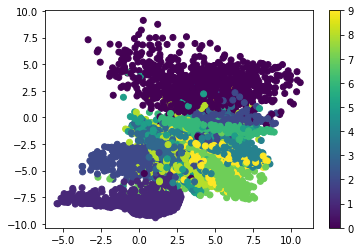

In [2]:
(x_train, _),(x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255. - 0.5
x_test = x_test.astype('float32')/255. - 0.5
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

encoding_dim = 2
input_img = Input(shape=(784,))

# encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

autoencoder = Model(input=input_img, output=decoded)

encoder = Model(input=input_img, output=encoder_output)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train, x_train, epochs=20, 
                batch_size=256, shuffle=True)

encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()